In [1]:
#all the imports are done here
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.max_seq_items = 1000

import warnings
def ignore_warnings(*args, **kwargs):
    pass
warnings.warn = ignore_warnings

# 1 - Understanding the data
* Mostly data exploration;
* Checking features, their distribution and missing values, dividing them in numerical or categorical.

In [2]:
#loading the data
data = pd.read_csv("ml_project1_data.csv", sep = ',')

### Data characteristics
We will be checking totals first in order to grasp start working

In [3]:
#getting to know the shape of the data
print('Shape = (Rows, Columns) ->', data.shape)
print()
data.info()

Shape = (Rows, Columns) -> (2240, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15 

### Looking into the values
- In order to see what we will be working with, we will check small bits of the data.

In [4]:
#taking a look at the first rows of the data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
#taking a look at the last rows of the data
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [6]:
#describing the data, getting to know its standard values, quantiles and means
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Reviewing types and classifying nulls
- Main objective is to check if column types are set according to expected (if numeric variables have numeric type and so on). Secondary objective is to get missing values from whole data.

In [7]:
#printing data types and how many unique values they have
print(data.dtypes)
data.nunique()

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Checking null values in the data
- In order to see if we have good and valid data, we should check how are nulls and missing proportion behaving.

In [8]:
#cheking null percentage
#data.isnull().sum()
#missing percentage
def missing(df):
    value = df.isna().sum()
    value = value[value>0]
    value_p = value/df.shape[0]
    value_t = value_p>0.05
    return pd.DataFrame({"Total number of missing values" : value, "Missing proportion in Data" : value_p, "Missing >= 5%?" : value_t})

missing(data)

,Total number of missing values,Missing proportion in Data,Missing >= 5%?
Income,24,0.010714,False


In [9]:
#dividing the data into numeric, categorical, target and other features
numeric_features = data[["Income", "Kidhome", "Teenhome", "Recency",
                        "MntWines", "MntFruits", "MntMeatProducts",
                        "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                        "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                        "NumStorePurchases", "NumWebVisitsMonth"
                        ]]

categorical_features = data[["Education", "Marital_Status", "AcceptedCmp1",
                            "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", 
                            "AcceptedCmp5", "Complain"
                            ]]

target = data[["Response"
              ]]

other_features = data[["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue"]]

### Features disposition so far =
* 15 numeric features;
* 8 categorical features;
* 1 target feature;
* 5 features amounting other specific data. If needs be, those can be detailed;
* - "Z_CostContact" and "Z_Revenue" show no significance as they do not vary or have missing types.
* Our target is the 'Response' feature as we are approaching targeted marketing in order to see how our clientes have responded so far and how we can get them to give us better responses, which means positively answering to our future campaigns.
* We will add "Dt_Customer" and "Year_Birth" to our numerical features further on as those features can help us predict our target better

### Target analysis
- Understanding the data for distinct target values.

In [10]:
#count related to client response
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [11]:
#client response mean
data['Response'].mean()

0.14910714285714285

In [12]:
#Checking how the data is behaving for those that have had a positive response in the last campaign
response_related_yes = data[data['Response']==1.0]
response_related_yes.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,334.000000,334.000000,333.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.0,334.0
mean,5421.820359,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982,3.0,11.0,1.0
std,3154.132439,12.398192,23194.080987,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,46.327903,57.507501,2.109924,2.558784,3.131817,3.081931,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.094489,0.0,0.0,0.0
min,1.000000,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
25%,2785.250000,1959.000000,39763.000000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,3.000000,20.000000,1.000000,3.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
50%,5133.000000,1971.000000,64090.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,20.000000,39.500000,1.000000,5.000000,4.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
75%,8127.750000,1979.000000,80589.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,57.000000,84.750000,3.000000,7.000000,6.000000,8.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
max,11133.000000,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,198.000000,245.000000,11.000000,11.000000,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.0


In [13]:
#Checking how the data is behaving for those that have had a negative response in the last campaign
response_related_no = data[data['Response']==0]
response_related_no.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1906.000000,1906.000000,1883.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.0,1906.0,1906.0
mean,5622.009444,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444,3.0,11.0,0.0
std,3262.498976,11.910143,25252.804747,0.544975,0.545670,28.519092,305.159188,38.191763,205.299936,52.870253,40.001067,50.576032,1.899981,2.780245,2.799722,3.277521,2.401348,0.207623,0.228214,0.189425,0.181541,0.072262,0.096745,0.0,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
25%,2839.250000,1959.000000,34421.000000,0.000000,0.000000,27.000000,21.250000,1.000000,14.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
50%,5528.000000,1970.000000,50150.000000,0.000000,1.000000,52.000000,152.000000,7.000000,56.000000,11.000000,7.000000,21.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
75%,8471.750000,1977.000000,66308.000000,1.000000,1.000000,77.000000,443.750000,28.000000,192.750000,43.000000,30.000000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,0.0


# 2 - Customer segmentation
* Insights on our data so far;
* Distribution analysis and discrimination.

In [14]:
#calculating total number of days since the beginning of the relationship
def days_since(dates_series, date_format):
    n = len(dates_series)
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    
    return result

In [15]:
#creating a data frame for all the numeric features, including the new ones proposed above
#(Age and Time since the beginning of the relationship)
num_features = data[["Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts",
                "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", 
                "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]]

def parse_date(td):
    resYear = float(td.days)/364.0                   # get the number of years including the the numbers after the dot
    resMonth = int((resYear - int(resYear))*364/30)  # get the number of months, by multiply the number after the dot by 364 and divide by 30.
    resYear = int(resYear)
    return str(resYear) + "Y" + str(resMonth) + "m"

num_features["DaysRelation"] = days_since(list(other_features.Dt_Customer), "%Y-%m-%d")

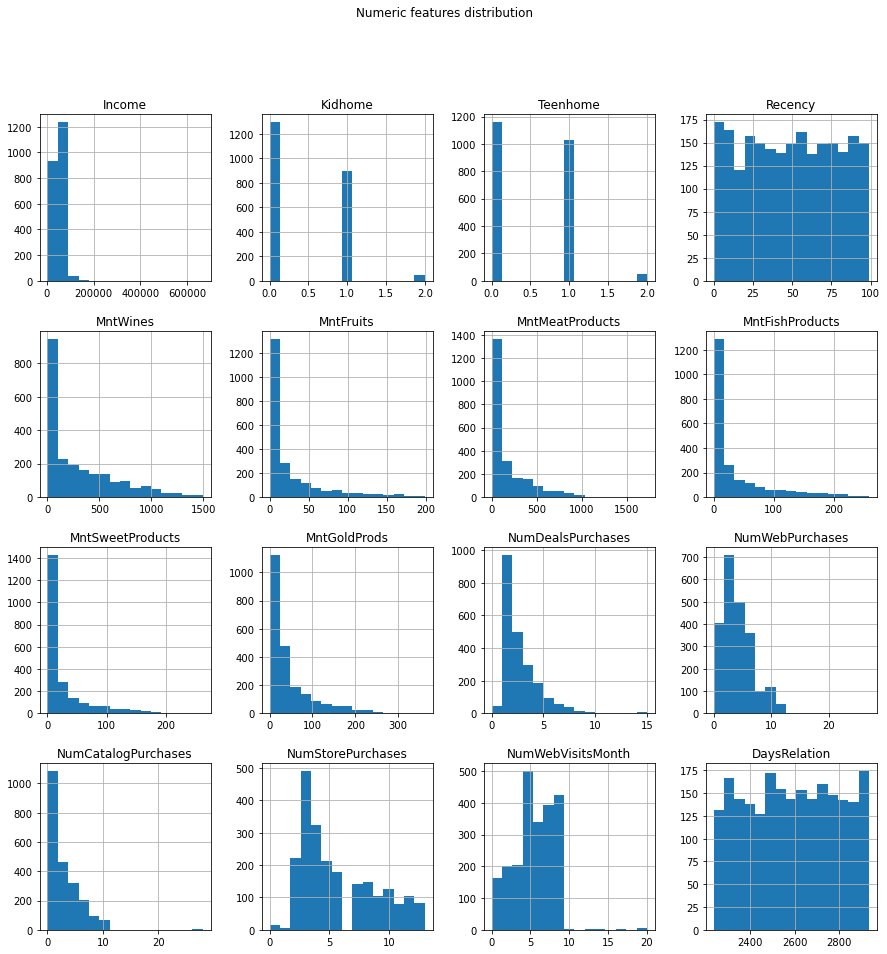

In [16]:
#numeric features distribution so far
num_features.hist(bins=15, figsize=[15,15])
plt.suptitle("Numeric features distribution")
plt.show()

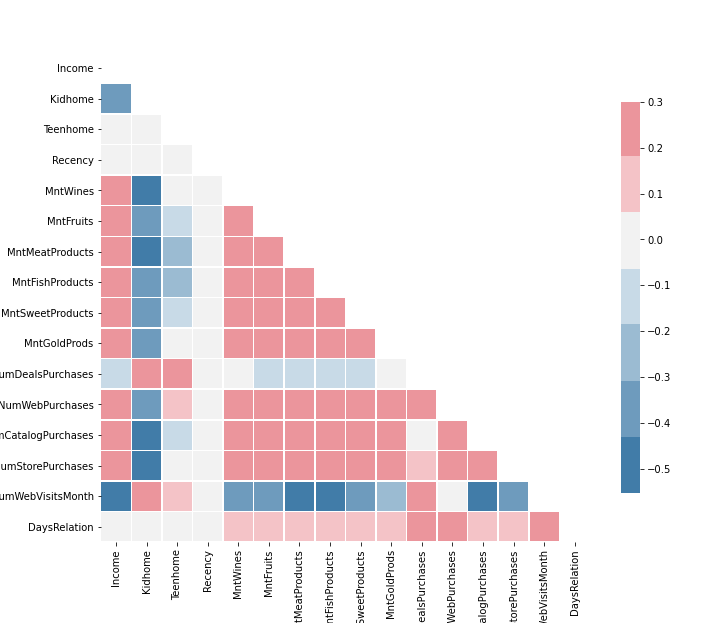

In [17]:
#correlation between numeric features
corr = num_features.corr()
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(240, 10, n=9)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.show()

### Insights:
- Most of the data is approaching people close to their late 40's years old;
- There are slightly more purchases made directly in stores than purchases made using catalogue or through the company's web site;
- Not many purchases are made in deal mode (NumDealsPurchases). Thus there can be an assumption that discounts are not the main factor for increasing revenue in our targeted campaign;
- Although we can see that there is a huge amount of visits to the web site, its sales are close to half of the sales made directly in stores;

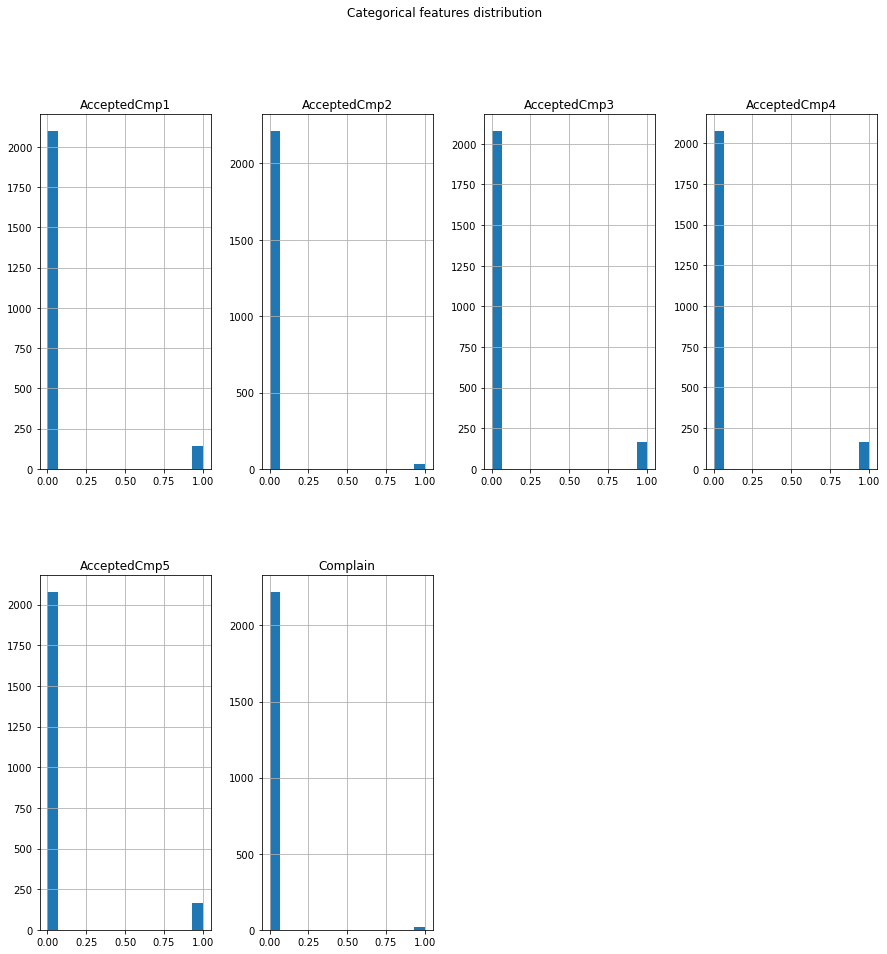

In [18]:
#numeric features distribution so far
categorical_features.hist(bins=15, figsize=[15,15], layout=(2, 4))
plt.suptitle("Categorical features distribution")
plt.show()

In [19]:
#categorical features relation to the "Response" feature
cat_features = ["Education", "Marital_Status", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", 
                "AcceptedCmp5", "Complain"]

def showdata(vl):
    if vl < .15:
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

# Categorical features analysis
# target = 'Response'
# occurrences threshold = 50 occurrences
# target relation threshold = 15% because of our 'Response' mean that is almost 15%
def cat_feat_describe(df, fc, target, n, thresh):

    fl = []
    if (type(fc)==list):
    
        for feature in fc:
            fl.append(df.groupby([feature]).agg({target : ["count", "mean"]}))    

            fm = pd.concat(fl, keys=fc)

            fm = pd.DataFrame({"Occurrences" : fm.iloc[:,0], "Target relation" : fm.iloc[:,1],
                                 ">= 50 occurrences?" : fm.iloc[:,0]>n})
    else:
        fm = (df.groupby(fc).agg({target : ["count", "mean"]}))
        
        fm = pd.DataFrame({"Number of Occurrences" : fm.iloc[:,0], "Target relation" : fm.iloc[:,1],
                                 ">= 50 occurrences?" : fm.iloc[:,0]>n})
        
    return fm

feat_sum = cat_feat_describe(data, cat_features, "Response", 50, 0.15)
feat_sum.style.applymap(showdata)

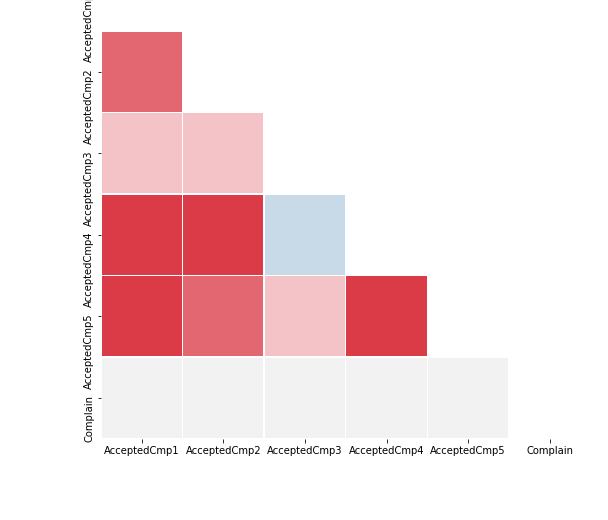

In [20]:
#correlation between categorical features
cat_features = data[["Education", "Marital_Status", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", 
                "AcceptedCmp5", "Complain"]]
corr = cat_features.corr()
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(240, 10, n=9)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.show()

### Insights:
- Our threshold for occurrences is of 50, as we are looking at 2% significance of each feature's distinct value;
- Relation to target is set to 15% because this was our target variable mean value ('Response');
- There were not many complaints on the campaigns, nonetheless our customers could have felt annoyed by them but they were not, nevertheless they might not be infatuated on our next campaigns.
- The second campaign was the best one if compared to the other campaigns, even though all the campaigns had a good relation to the 'Response' when we observe the target relation;
- The only values for 'Marital_Status' that are below 'Response' mean value are Married and Together, showing that these do not tend to have a positive response on our campaigns;
- PhD and Master values on the 'Education' field are above 'Response' mean value (15%);

# 3 - Classification model
* Creating a predictive model using our data;
* Goal -> maximize profit on our next marketing campaing.

In [21]:
#detecting anomalies using isolation forest
#creating our train data with all variables
train = data[["Income", "Kidhome", "Teenhome", "Recency",
              "MntWines", "MntFruits", "MntMeatProducts",
              "MntFishProducts", "MntSweetProducts", "MntGoldProds",
              "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
              "NumStorePurchases", "NumWebVisitsMonth", "Education", "Marital_Status", 
              "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain",
              "ID", "Year_Birth", "Response"
              ]]

train["DaysRelation"] = days_since(list(other_features.Dt_Customer), "%Y-%m-%d")

In [22]:
# linear regression model to input missing values
# preparing our categorical features that have more than 2 distinct values
X = train
y = X["Income"]
y = y[-y.isna()]

X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

x_pred = X[X.Income.isna()]
x_pred = x_pred.drop(columns="Income")

X = X[-X.Income.isna()]
X = X.drop(columns="Income")

# Linear Regression Model
reg = LinearRegression().fit(X, y)

# Predictions
y_pred = reg.predict(x_pred)

# Store the predictions in the missing values
train.loc[train.Income.isna(), "Income"] = y_pred

In [23]:
# checking inconsistencies on year birth feature
print(train[(2020 - train["Year_Birth"]) >=90])

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
192  36640.0        1         0       99        15          6   
239  60182.0        0         1       23         8          0   
339  83532.0        0         0       36       755        144   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
192                8                7                 4            25   
239                5                7                 0             2   
339              562              104                64           224   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192                  1                2                    1   
239                  1                1                    0   
339                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  Education  Marital_Status  \
192                  2                  5          0               2   
239                  2                  4          

In [24]:
# since it's not likely that there are people from the 19th century still going on around, we will be cleaning them
X = train
y = X[(2020 - X["Year_Birth"])<=90].Year_Birth
X = X.drop(columns=["ID"])

X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

x_pred = X[(2020 - X["Year_Birth"])>=90]
x_pred = x_pred.drop(columns="Year_Birth")

X = X[(2020 - X["Year_Birth"])<90]
X = X.drop(columns="Year_Birth")

# Linear Regression Model
reg = LinearRegression().fit(X, y)

# Predictions
y_pred = reg.predict(x_pred)

# Store the predictions in the missing values
train.loc[(2020 - train["Year_Birth"])>=90, "Year_Birth"] = y_pred.round()
train["Year_Birth"].astype('int')

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int32

In [25]:
#checking if there are any null values in the train data
train.sum().isna()

Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Education              False
Marital_Status         False
AcceptedCmp1           False
AcceptedCmp2           False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
Complain               False
ID                     False
Year_Birth             False
Response               False
DaysRelation           False
dtype: bool

In [26]:
#taking a look into the first rows of the train data
train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,2,4,0,0,0,0,0,0,5524,1957.0,1,2898
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2,4,0,0,0,0,0,0,2174,1954.0,0,2348
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,2,5,0,0,0,0,0,0,4141,1965.0,0,2547
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,2,5,0,0,0,0,0,0,6182,1984.0,0,2374
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,4,3,0,0,0,0,0,0,5324,1981.0,0,2396


In [27]:
#describing the train data, getting its quantiles and means
train.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.267706,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,2.393750,3.729911,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,5592.159821,1968.903125,0.149107,2588.582143
std,25106.081204,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,1.124797,1.076277,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,3246.662198,11.695213,0.356274,202.122512
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1940.000000,0.000000,2235.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2828.250000,1959.000000,0.000000,2415.750000
50%,51342.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5458.500000,1970.000000,0.000000,2590.500000
75%,68468.250000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8427.750000,1977.000000,0.000000,2764.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11191.000000,1996.000000,1.000000,2934.000000


### Analysing outliers using Isolation Forest
* Score formula = https://miro.medium.com/max/436/1*Zha5PJSauUmig8gstAjflg.png
* h(x) is the path length of observation x
* c(n) is the average path length of unsuccessful search in a Binary Search Tree
* n is the number of external nodes
* taken from https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

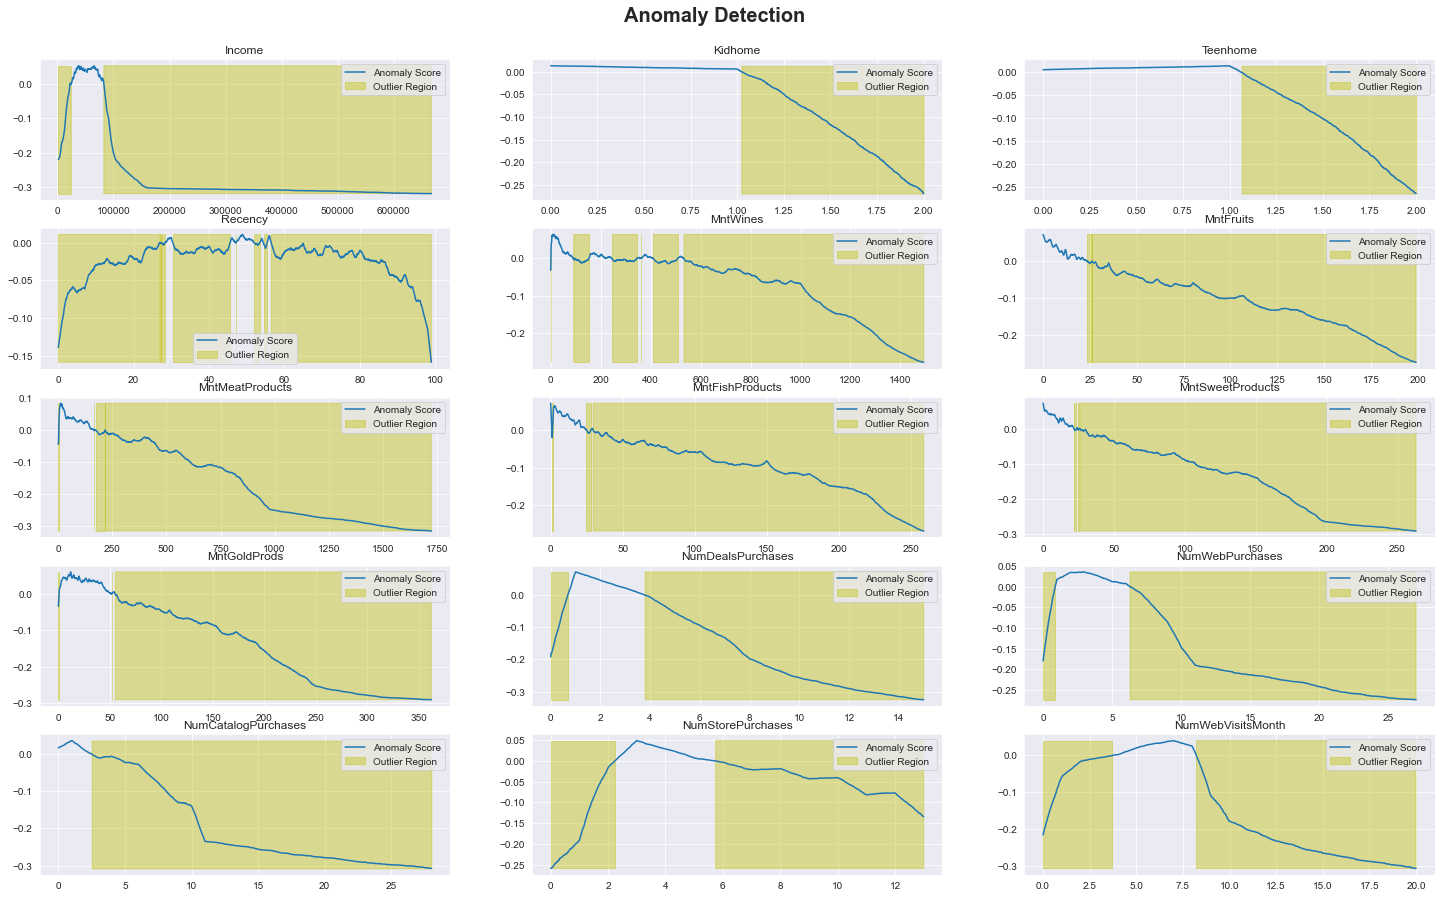

In [28]:
#taken from https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
#with steps from https://towardsdatascience.com/feature-engineering-and-data-preparation-using-supermarket-sales-data-part-2-171b7a7a7eb7
def anomaly_plot(df, num_feat_list, l, c):
    sns.set_style("darkgrid") 
    fig, axs = plt.subplots(l, c, figsize=(25, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    for i, column in enumerate(num_feat_list):
        isolation_forest = IsolationForest(n_estimators=1000, contamination="auto")
        isolation_forest.fit(df[column].values.reshape(-1,1))

        xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
        anomaly_score = isolation_forest.decision_function(xx)
        outlier = isolation_forest.predict(xx)
    
        axs[i].plot(xx, anomaly_score, label='Anomaly Score')
        axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='y', 
                     alpha=.4, label='Outlier Region')
        axs[i].legend()
        axs[i].set_title(column)
        
    fig.suptitle('Anomaly Detection', ha='center',
                     va='center', fontsize=20, y=0.92, fontweight='bold')
        
    return

num_feat = ["Income", "Kidhome", "Teenhome", "Recency",
              "MntWines", "MntFruits", "MntMeatProducts",
              "MntFishProducts", "MntSweetProducts", "MntGoldProds",
              "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
              "NumStorePurchases", "NumWebVisitsMonth"]

anomaly_plot(train, num_feat, 5, 3)

### Splitting the dataset

In [29]:
#splitting the dataset using random seeds
#we will use 40% of our base as test and 60% as training
seeds = [3, 27, 91, 150, 475, 2020]
X_train, X_test, y_train, y_test = train_test_split(train, train["Response"], test_size=0.4, random_state=seeds[0])

In [30]:
#calculating how much was spent on gold products out of the total (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = X_train["MntGoldProds"].iloc[i]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])

X_train["PercentageGoldProducts"] = aux
X_train["PercentageGoldProducts"].head()

972     0.393939
1746    0.400000
1       0.285714
335     0.172243
2217    0.048428
Name: PercentageGoldProducts, dtype: float64

In [31]:
#calculating how much was spent on gold products out of the total (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = X_test["MntGoldProds"].iloc[i]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
X_test["PercentageGoldProducts"] = aux
X_test["PercentageGoldProducts"].head()

1450    0.135870
610     0.175439
269     0.456522
1095    0.068010
1852    0.039318
Name: PercentageGoldProducts, dtype: float64

In [32]:
#calculating how many campaigns each prospect accepted in the last 5 campaigns (train)
aux = [0]* X_train.shape[0]


for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
X_train["TotalAcceptedCampaigns"] = aux
X_train["TotalAcceptedCampaigns"].head()

972     0
1746    0
1       0
335     0
2217    0
Name: TotalAcceptedCampaigns, dtype: int64

In [33]:
#calculating how many campaigns each prospect accepted in the last 5 campaigns (test)
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
X_test["TotalAcceptedCampaigns"] = aux
X_test["TotalAcceptedCampaigns"].head()

1450    0
610     0
269     0
1095    0
1852    0
Name: TotalAcceptedCampaigns, dtype: int64

In [34]:
#accepted campaigns proportion (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
X_train["PercentageAcceptedCampaigns"] = aux
X_train["PercentageAcceptedCampaigns"].head()

972     0.0
1746    0.0
1       0.0
335     0.0
2217    0.0
Name: PercentageAcceptedCampaigns, dtype: float64

In [35]:
#accepted campaigns proportion (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
X_test["PercentageAcceptedCampaigns"] = aux
X_test["PercentageAcceptedCampaigns"].head()

1450    0.0
610     0.0
269     0.0
1095    0.0
1852    0.0
Name: PercentageAcceptedCampaigns, dtype: float64

In [36]:
#calculating how much was spent on wine products out of the total (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntWines"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PercentageWine"] = aux
X_train["PercentageWine"].head()

972     0.242424
1746    0.050000
1       0.523810
335     0.392813
2217    0.282073
Name: PercentageWine, dtype: float64

In [37]:
#calculating how much was spent on wine products out of the total (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntWines"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PercentageWine"] = aux
X_test["PercentageWine"].head()

1450    0.304348
610     0.442982
269     0.217391
1095    0.408060
1852    0.238872
Name: PercentageWine, dtype: float64

In [38]:
#calculating how much was spent on fruit products out of the total (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntFruits"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PercentageFruit"] = aux
X_train["PercentageFruit"].head()

972     0.075758
1746    0.250000
1       0.047619
335     0.057001
2217    0.164826
Name: PercentageFruit, dtype: float64

In [39]:
#calculating how much was spent on fruit products out of the total (test)
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntFruits"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PercentageFruit"] = aux
X_test["PercentageFruit"].head()

1450    0.054348
610     0.057018
269     0.152174
1095    0.125945
1852    0.039318
Name: PercentageFruit, dtype: float64

In [40]:
#calculating how much was spent on meat products out of the total (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntMeatProducts"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PercentageMeat"] = aux
X_train["PercentageMeat"].head()

972     0.454545
1746    0.150000
1       0.285714
335     0.306072
2217    0.320306
Name: PercentageMeat, dtype: float64

In [41]:
#calculating how much was spent on meat products out of the total (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntMeatProducts"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PercentageMeat"] = aux
X_test["PercentageMeat"].head()

1450    0.500000
610     0.333333
269     0.413043
1095    0.251889
1852    0.666914
Name: PercentageMeat, dtype: float64

In [42]:
#calculating how much was spent on fish products out of the total (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntFishProducts"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PercentageFish"] = aux
X_train["PercentageFish"].head()

972     0.121212
1746    0.350000
1       0.095238
335     0.187113
2217    0.126593
Name: PercentageFish, dtype: float64

In [43]:
#calculating how much was spent on fish products out of the total (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntFishProducts"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PercentageFish"] = aux
X_test["PercentageFish"].head()

1450    0.103261
610     0.087719
269     0.173913
1095    0.138539
1852    0.025223
Name: PercentageFish, dtype: float64

In [44]:
#total monetary value spent (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
X_train["ValueSpent"] = aux
X_train["ValueSpent"].head()

972       66
1746      20
1         21
335      807
2217    1177
Name: ValueSpent, dtype: int64

In [45]:
#total monetary value spent (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
X_test["ValueSpent"] = aux
X_test["ValueSpent"].head()

1450     184
610      228
269       46
1095     397
1852    1348
Name: ValueSpent, dtype: int64

In [46]:
#consumption potential = amount spent / income (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((X_train[["Income"]].iloc[i,:])*2))   
    
X_train["ConPotential"] = aux
X_train["ConPotential"].head()

972     0.002100
1746    0.000352
1       0.000227
335     0.006487
2217    0.007174
Name: ConPotential, dtype: float64

In [47]:
#consumption potential = amount spent / income (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((X_test[["Income"]].iloc[i,:])*2))
    
X_test["ConPotential"] = aux
X_test["ConPotential"].head()

1450    0.001998
610     0.004242
269     0.001042
1095    0.003211
1852    0.009340
Name: ConPotential, dtype: float64

In [48]:
#frequency from campaigns (train)
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
X_train["Frequency"] = aux
X_train["Frequency"].head()

972     10
1746     4
1        6
335     22
2217    17
Name: Frequency, dtype: int64

In [49]:
#frequency from campaigns (test)
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
X_test["Frequency"] = aux
X_test["Frequency"].head()

1450    12
610     12
269      8
1095    15
1852    21
Name: Frequency, dtype: int64

In [50]:
#creating a RFM feature - Recency, Frequency and monetary value
#for this we will use our features = Recency, Frequency and ValueSpent
#we will classify our RFM feature according to the quantiles creating a RFM score
#taken from https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python
#train data
feature_list, n_bins = ["Recency", "Frequency", "ValueSpent"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
    feature_bin = bindisc.fit_transform(X_train[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=X_train.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+ "_bin"] = feature_bin.astype(int).astype(str)

X_train["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Frequency_bin'] + rfb_dict['ValueSpent_bin']).astype(int)
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM
972,15716.0,1,0,8,16,5,30,8,7,26,3,3,0,4,8,0,3,0,0,0,0,0,1,10995,1988.0,0,2829,0.393939,0,0.0,0.242424,0.075758,0.454545,0.121212,66,0.002100,10,522
1746,28389.0,0,0,49,1,5,3,7,4,8,1,1,0,2,7,1,5,0,0,0,0,0,0,10250,1947.0,0,2821,0.400000,0,0.0,0.050000,0.250000,0.150000,0.350000,20,0.000352,4,311
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2,4,0,0,0,0,0,0,2174,1954.0,0,2348,0.285714,0,0.0,0.523810,0.047619,0.285714,0.095238,21,0.000227,6,311
335,62204.0,0,2,38,317,46,247,151,46,139,1,4,5,12,3,2,2,0,0,0,0,0,0,10151,1960.0,0,2890,0.172243,0,0.0,0.392813,0.057001,0.306072,0.187113,807,0.006487,22,354
2217,82032.0,0,0,54,332,194,377,149,125,57,0,4,6,7,1,4,6,0,0,0,0,0,0,9589,1948.0,0,2320,0.048428,0,0.0,0.282073,0.164826,0.320306,0.126593,1177,0.007174,17,345


In [51]:
#creating a RFM feature - Recency, Frequency and monetary value
#for this we will use our features = Recency, Frequency and ValueSpent
#we will classify our RFM feature according to the quantiles creating a RFM score
#taken from https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python
#test data
feature_list, n_bins = ["Recency", "Frequency", "ValueSpent"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
    feature_bin = bindisc.fit_transform(X_test[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=X_test.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+ "_bin"] = feature_bin.astype(int).astype(str)

X_test["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Frequency_bin'] + rfb_dict['ValueSpent_bin']).astype(int)
X_test.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM
1450,46053.0,1,0,46,56,10,92,19,7,25,3,3,2,4,5,2,5,0,0,0,0,0,0,5788,1972.0,0,2732,0.135870,0,0.0,0.304348,0.054348,0.500000,0.103261,184,0.001998,12,333
610,26877.0,0,0,74,101,13,76,20,18,40,2,3,1,6,6,3,4,0,0,0,0,0,0,7930,1969.0,0,2549,0.175439,0,0.0,0.442982,0.057018,0.333333,0.087719,228,0.004242,12,233
269,22070.0,1,0,11,10,7,19,8,2,21,2,2,2,2,6,2,5,0,0,0,0,0,0,4557,1970.0,0,2503,0.456522,0,0.0,0.217391,0.152174,0.413043,0.173913,46,0.001042,8,522
1095,61825.0,0,1,56,162,50,100,55,30,27,1,4,2,8,4,2,4,0,0,0,0,0,0,9964,1979.0,0,2561,0.068010,0,0.0,0.408060,0.125945,0.251889,0.138539,397,0.003211,15,333
1852,72159.0,0,0,62,322,53,899,34,40,53,1,4,6,10,2,4,3,0,0,0,0,0,0,1168,1978.0,0,2843,0.039318,0,0.0,0.238872,0.039318,0.666914,0.025223,1348,0.009340,21,245


In [52]:
#scaling features using MinMaxScaler
num_feat.extend(('PercentageGoldProducts', 'TotalAcceptedCampaigns', 'PercentageAcceptedCampaigns', 'PercentageWine'
                ,'PercentageFruit', 'PercentageMeat', 'PercentageFish', 'ValueSpent'
                ,'ConPotential', 'Frequency', 'RFM'))

In [53]:
#scikit preprocessing taken from https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
#scaling taken from https://benalexkeen.com/feature-scaling-with-scikit-learn/
#minmax scaling = (x-min(x))/(max(x)-min(x))

suf = '_scaled'
data_scaler = X_train[num_feat]
data_scaler_test = X_test[num_feat]

fscaler = MinMaxScaler()
scaled_d = fscaler.fit_transform(data_scaler.values)
scaled_d_test = fscaler.fit_transform(data_scaler_test.values)

colnames = [s + suf for s in data_scaler.columns]

X_train = pd.concat([X_train, pd.DataFrame(scaled_d, index=data_scaler.index, columns=colnames)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(scaled_d_test, index=data_scaler_test.index, columns=colnames)], axis=1)

In [54]:
#taking a look at our processed train data
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled
972,15716.0,1,0,8,16,5,30,8,7,26,3,3,0,4,8,0,3,0,0,0,0,0,1,10995,1988.0,0,2829,0.393939,0,0.0,0.242424,0.075758,0.454545,0.121212,66,0.002100,10,522,0.087922,0.5,0.0,0.080808,0.010717,0.025126,0.016821,0.031008,0.026718,0.089347,0.200000,0.111111,0.000000,0.307692,0.40,0.169218,0.0,0.0,0.249351,0.122054,0.449559,0.169697,0.025567,0.005898,0.227273,0.925676
1746,28389.0,0,0,49,1,5,3,7,4,8,1,1,0,2,7,1,5,0,0,0,0,0,0,10250,1947.0,0,2821,0.400000,0,0.0,0.050000,0.250000,0.150000,0.350000,20,0.000352,4,311,0.167590,0.0,0.0,0.494949,0.000670,0.025126,0.001160,0.027132,0.015267,0.027491,0.066667,0.037037,0.000000,0.153846,0.35,0.171821,0.0,0.0,0.051429,0.402778,0.140920,0.490000,0.006598,0.000951,0.090909,0.450450
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2,4,0,0,0,0,0,0,2174,1954.0,0,2348,0.285714,0,0.0,0.523810,0.047619,0.285714,0.095238,21,0.000227,6,311,0.280462,0.5,0.5,0.383838,0.007368,0.005025,0.002900,0.007752,0.003817,0.020619,0.133333,0.037037,0.035714,0.153846,0.25,0.122730,0.0,0.0,0.538776,0.076720,0.278458,0.133333,0.007010,0.000595,0.136364,0.450450
335,62204.0,0,2,38,317,46,247,151,46,139,1,4,5,12,3,2,2,0,0,0,0,0,0,10151,1960.0,0,2890,0.172243,0,0.0,0.392813,0.057001,0.306072,0.187113,807,0.006487,22,354,0.380165,0.0,1.0,0.383838,0.212324,0.231156,0.142691,0.585271,0.175573,0.477663,0.066667,0.148148,0.178571,0.923077,0.15,0.073987,0.0,0.0,0.404036,0.091835,0.299090,0.261958,0.331134,0.018316,0.500000,0.547297
2217,82032.0,0,0,54,332,194,377,149,125,57,0,4,6,7,1,4,6,0,0,0,0,0,0,9589,1948.0,0,2320,0.048428,0,0.0,0.282073,0.164826,0.320306,0.126593,1177,0.007174,17,345,0.504812,0.0,0.0,0.545455,0.222371,0.974874,0.218097,0.577519,0.477099,0.195876,0.000000,0.148148,0.214286,0.538462,0.05,0.020802,0.0,0.0,0.290132,0.265553,0.313515,0.177230,0.483711,0.020261,0.386364,0.527027


In [55]:
#taking a look at our processed test data
X_test.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled
1450,46053.0,1,0,46,56,10,92,19,7,25,3,3,2,4,5,2,5,0,0,0,0,0,0,5788,1972.0,0,2732,0.135870,0,0.0,0.304348,0.054348,0.500000,0.103261,184,0.001998,12,333,0.063428,0.5,0.0,0.464646,0.037534,0.050761,0.058154,0.073359,0.026616,0.069061,0.200000,0.111111,0.090909,0.307692,0.263158,0.016084,0.0,0.0,0.315090,0.071256,0.507901,0.137681,0.071256,0.120851,0.324324,0.500000
610,26877.0,0,0,74,101,13,76,20,18,40,2,3,1,6,6,3,4,0,0,0,0,0,0,7930,1969.0,0,2549,0.175439,0,0.0,0.442982,0.057018,0.333333,0.087719,228,0.004242,12,233,0.034489,0.0,0.0,0.747475,0.067694,0.065990,0.048040,0.077220,0.068441,0.110497,0.133333,0.111111,0.045455,0.461538,0.315789,0.020768,0.0,0.0,0.458617,0.074756,0.338601,0.116959,0.088969,0.258125,0.324324,0.274775
269,22070.0,1,0,11,10,7,19,8,2,21,2,2,2,2,6,2,5,0,0,0,0,0,0,4557,1970.0,0,2503,0.456522,0,0.0,0.217391,0.152174,0.413043,0.173913,46,0.001042,8,522,0.027235,0.5,0.0,0.111111,0.006702,0.035533,0.012010,0.030888,0.007605,0.058011,0.133333,0.074074,0.090909,0.153846,0.315789,0.054043,0.0,0.0,0.225064,0.199517,0.419571,0.231884,0.015700,0.062391,0.216216,0.925676
1095,61825.0,0,1,56,162,50,100,55,30,27,1,4,2,8,4,2,4,0,0,0,0,0,0,9964,1979.0,0,2561,0.068010,0,0.0,0.408060,0.125945,0.251889,0.138539,397,0.003211,15,333,0.087229,0.0,0.5,0.565657,0.108579,0.253807,0.063211,0.212355,0.114068,0.074586,0.066667,0.148148,0.090909,0.615385,0.210526,0.008051,0.0,0.0,0.422463,0.165127,0.255870,0.184719,0.157005,0.195058,0.405405,0.500000
1852,72159.0,0,0,62,322,53,899,34,40,53,1,4,6,10,2,4,3,0,0,0,0,0,0,1168,1978.0,0,2843,0.039318,0,0.0,0.238872,0.039318,0.666914,0.025223,1348,0.009340,21,245,0.102825,0.0,0.0,0.626263,0.215818,0.269036,0.568268,0.131274,0.152091,0.146409,0.066667,0.148148,0.272727,0.769231,0.105263,0.004654,0.0,0.0,0.247303,0.051550,0.677453,0.033630,0.539855,0.570067,0.567568,0.301802


In [56]:
#box-cox transformation
#taken from https://www.geeksforgeeks.org/box-cox-transformation-using-python/
#receives a dataframe consisting only of scaled features and the target, and the name of the target feature.
#returns both the dataframe with the features already transformed to the best transformation and a dictionary
#with the name of each feature with its best transformation name.
def power_transf(df, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in df.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(df[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: df[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        df[feature] = best_power_trans
        
    return df, best_power_dict

In [57]:
def power_transf(X_train, X_test, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in X_train.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(X_train[feature])
            feature_trans_test = trans_value(X_test[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.
                feature_trans_test.loc[np.isfinite(feature_trans_test)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=X_train.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: X_train[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        X_train[feature] = best_power_trans
        
    return X_train, X_test, best_power_dict

In [58]:
#we need to create a dataframe containing only the scaled features with the Response.
df_pt = X_train.iloc[:,-15:]
df_pt_test = X_test.iloc[:,-15:]

df_pt["Response"] = X_train["Response"]

data_pt, data_pt_test, best_pt = power_transf(df_pt, df_pt_test, "Response")

print("Best Power Transformation for each feature:")
for key in best_pt:
    print("\t->", key, best_pt[key][1])

Best Power Transformation for each feature:
	-> NumWebPurchases_scaled sqrt
	-> NumCatalogPurchases_scaled sqrt
	-> NumStorePurchases_scaled x
	-> NumWebVisitsMonth_scaled **1/4
	-> PercentageGoldProducts_scaled **1/4
	-> TotalAcceptedCampaigns_scaled x
	-> PercentageAcceptedCampaigns_scaled x
	-> PercentageWine_scaled **4
	-> PercentageFruit_scaled **1/4
	-> PercentageMeat_scaled x
	-> PercentageFish_scaled **1/4
	-> ValueSpent_scaled **2
	-> ConPotential_scaled **1/4
	-> Frequency_scaled sqrt
	-> RFM_scaled **2


In [59]:
#replacing the old columns of scaled features with the features transformed according to the best transformation
coln = data_pt.columns[:-1]

X_train.drop(columns=coln, inplace=True)
X_train[coln] = data_pt[coln]

X_test.drop(columns=coln, inplace=True)
X_test[coln] = data_pt_test[coln]

In [60]:
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled
972,15716.0,1,0,8,16,5,30,8,7,26,3,3,0,4,8,0,3,0,0,0,0,0,1,10995,1988.0,0,2829,0.393939,0,0.0,0.242424,0.075758,0.454545,0.121212,66,0.002100,10,522,0.087922,0.5,0.0,0.080808,0.010717,0.025126,0.016821,0.031008,0.026718,0.089347,0.200000,0.333333,0.000000,0.307692,0.795271,0.641374,0.0,0.0,0.003866,0.591069,0.449559,0.641828,0.000654,0.277123,0.476731,0.856875
1746,28389.0,0,0,49,1,5,3,7,4,8,1,1,0,2,7,1,5,0,0,0,0,0,0,10250,1947.0,0,2821,0.400000,0,0.0,0.050000,0.250000,0.150000,0.350000,20,0.000352,4,311,0.167590,0.0,0.0,0.494949,0.000670,0.025126,0.001160,0.027132,0.015267,0.027491,0.066667,0.192450,0.000000,0.153846,0.769161,0.643827,0.0,0.0,0.000007,0.796648,0.140920,0.836660,0.000044,0.175614,0.301511,0.202906
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2,4,0,0,0,0,0,0,2174,1954.0,0,2348,0.285714,0,0.0,0.523810,0.047619,0.285714,0.095238,21,0.000227,6,311,0.280462,0.5,0.5,0.383838,0.007368,0.005025,0.002900,0.007752,0.003817,0.020619,0.133333,0.192450,0.188982,0.153846,0.707107,0.591885,0.0,0.0,0.084262,0.526292,0.278458,0.604275,0.000049,0.156205,0.369274,0.202906
335,62204.0,0,2,38,317,46,247,151,46,139,1,4,5,12,3,2,2,0,0,0,0,0,0,10151,1960.0,0,2890,0.172243,0,0.0,0.392813,0.057001,0.306072,0.187113,807,0.006487,22,354,0.380165,0.0,1.0,0.383838,0.212324,0.231156,0.142691,0.585271,0.175573,0.477663,0.066667,0.384900,0.422577,0.923077,0.622333,0.521542,0.0,0.0,0.026649,0.550494,0.299090,0.715415,0.109650,0.367880,0.707107,0.299534
2217,82032.0,0,0,54,332,194,377,149,125,57,0,4,6,7,1,4,6,0,0,0,0,0,0,9589,1948.0,0,2320,0.048428,0,0.0,0.282073,0.164826,0.320306,0.126593,1177,0.007174,17,345,0.504812,0.0,0.0,0.545455,0.222371,0.974874,0.218097,0.577519,0.477099,0.195876,0.000000,0.384900,0.462910,0.538462,0.472871,0.379777,0.0,0.0,0.007086,0.717857,0.313515,0.648835,0.233977,0.377283,0.621582,0.277757


In [61]:
X_test.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled
1450,46053.0,1,0,46,56,10,92,19,7,25,3,3,2,4,5,2,5,0,0,0,0,0,0,5788,1972.0,0,2732,0.135870,0,0.0,0.304348,0.054348,0.500000,0.103261,184,0.001998,12,333,0.063428,0.5,0.0,0.464646,0.037534,0.050761,0.058154,0.073359,0.026616,0.069061,0.200000,0.111111,0.090909,0.307692,0.263158,0.016084,0.0,0.0,0.315090,0.071256,0.507901,0.137681,0.071256,0.120851,0.324324,0.500000
610,26877.0,0,0,74,101,13,76,20,18,40,2,3,1,6,6,3,4,0,0,0,0,0,0,7930,1969.0,0,2549,0.175439,0,0.0,0.442982,0.057018,0.333333,0.087719,228,0.004242,12,233,0.034489,0.0,0.0,0.747475,0.067694,0.065990,0.048040,0.077220,0.068441,0.110497,0.133333,0.111111,0.045455,0.461538,0.315789,0.020768,0.0,0.0,0.458617,0.074756,0.338601,0.116959,0.088969,0.258125,0.324324,0.274775
269,22070.0,1,0,11,10,7,19,8,2,21,2,2,2,2,6,2,5,0,0,0,0,0,0,4557,1970.0,0,2503,0.456522,0,0.0,0.217391,0.152174,0.413043,0.173913,46,0.001042,8,522,0.027235,0.5,0.0,0.111111,0.006702,0.035533,0.012010,0.030888,0.007605,0.058011,0.133333,0.074074,0.090909,0.153846,0.315789,0.054043,0.0,0.0,0.225064,0.199517,0.419571,0.231884,0.015700,0.062391,0.216216,0.925676
1095,61825.0,0,1,56,162,50,100,55,30,27,1,4,2,8,4,2,4,0,0,0,0,0,0,9964,1979.0,0,2561,0.068010,0,0.0,0.408060,0.125945,0.251889,0.138539,397,0.003211,15,333,0.087229,0.0,0.5,0.565657,0.108579,0.253807,0.063211,0.212355,0.114068,0.074586,0.066667,0.148148,0.090909,0.615385,0.210526,0.008051,0.0,0.0,0.422463,0.165127,0.255870,0.184719,0.157005,0.195058,0.405405,0.500000
1852,72159.0,0,0,62,322,53,899,34,40,53,1,4,6,10,2,4,3,0,0,0,0,0,0,1168,1978.0,0,2843,0.039318,0,0.0,0.238872,0.039318,0.666914,0.025223,1348,0.009340,21,245,0.102825,0.0,0.0,0.626263,0.215818,0.269036,0.568268,0.131274,0.152091,0.146409,0.066667,0.148148,0.272727,0.769231,0.105263,0.004654,0.0,0.0,0.247303,0.051550,0.677453,0.033630,0.539855,0.570067,0.567568,0.301802


In [62]:
#merging categories
#in Marital_Status:  "Single" as 3, "Widow" as 2, "Divorced" as 1 and ["Married", "Together"] as 0
X_train["Marital_Status_bin"] = X_train['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

X_test["Marital_Status_bin"] = X_test['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

In [63]:
#in Education: "Phd" as 2, "Master" as 1 and ['Graduation', 'Basic', '2n Cycle'] as 0
X_train["Education_bin"] = X_train['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

X_test["Education_bin"] = X_test['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

In [64]:
#converting Kidhome and Teenhome to int
X_train["Kidhome"] = X_train['Kidhome'].astype(int)
X_train["Teenhome"] = X_train['Teenhome'].astype(int)

X_test["Kidhome"] = X_test['Kidhome'].astype(int)
X_test["Teenhome"] = X_test['Teenhome'].astype(int)

In [65]:
#creating a new feature called HasOffspring, which defines if the client has children, be a kid or a teenager, or not
#train data
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    if(int(X_train[["Kidhome"]].iloc[i,:])+int(X_train[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
X_train["HasOffspring"] = aux
X_train["HasOffspring"].head()

972     1
1746    0
1       1
335     1
2217    0
Name: HasOffspring, dtype: int64

In [66]:
#creating a new feature called HasOffspring, which defines if the client has children, be a kid or a teenager, or not
#test data
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    if(int(X_test[["Kidhome"]].iloc[i,:])+int(X_test[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
X_test["HasOffspring"] = aux
X_test["HasOffspring"].head()

1450    1
610     0
269     1
1095    1
1852    0
Name: HasOffspring, dtype: int64

In [67]:
#look into our train data
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled,Marital_Status_bin,Education_bin,HasOffspring
972,15716.0,1,0,8,16,5,30,8,7,26,3,3,0,4,8,0,3,0,0,0,0,0,1,10995,1988.0,0,2829,0.393939,0,0.0,0.242424,0.075758,0.454545,0.121212,66,0.002100,10,522,0.087922,0.5,0.0,0.080808,0.010717,0.025126,0.016821,0.031008,0.026718,0.089347,0.200000,0.333333,0.000000,0.307692,0.795271,0.641374,0.0,0.0,0.003866,0.591069,0.449559,0.641828,0.000654,0.277123,0.476731,0.856875,0,0,1
1746,28389.0,0,0,49,1,5,3,7,4,8,1,1,0,2,7,1,5,0,0,0,0,0,0,10250,1947.0,0,2821,0.400000,0,0.0,0.050000,0.250000,0.150000,0.350000,20,0.000352,4,311,0.167590,0.0,0.0,0.494949,0.000670,0.025126,0.001160,0.027132,0.015267,0.027491,0.066667,0.192450,0.000000,0.153846,0.769161,0.643827,0.0,0.0,0.000007,0.796648,0.140920,0.836660,0.000044,0.175614,0.301511,0.202906,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2,4,0,0,0,0,0,0,2174,1954.0,0,2348,0.285714,0,0.0,0.523810,0.047619,0.285714,0.095238,21,0.000227,6,311,0.280462,0.5,0.5,0.383838,0.007368,0.005025,0.002900,0.007752,0.003817,0.020619,0.133333,0.192450,0.188982,0.153846,0.707107,0.591885,0.0,0.0,0.084262,0.526292,0.278458,0.604275,0.000049,0.156205,0.369274,0.202906,0,0,1
335,62204.0,0,2,38,317,46,247,151,46,139,1,4,5,12,3,2,2,0,0,0,0,0,0,10151,1960.0,0,2890,0.172243,0,0.0,0.392813,0.057001,0.306072,0.187113,807,0.006487,22,354,0.380165,0.0,1.0,0.383838,0.212324,0.231156,0.142691,0.585271,0.175573,0.477663,0.066667,0.384900,0.422577,0.923077,0.622333,0.521542,0.0,0.0,0.026649,0.550494,0.299090,0.715415,0.109650,0.367880,0.707107,0.299534,0,0,1
2217,82032.0,0,0,54,332,194,377,149,125,57,0,4,6,7,1,4,6,0,0,0,0,0,0,9589,1948.0,0,2320,0.048428,0,0.0,0.282073,0.164826,0.320306,0.126593,1177,0.007174,17,345,0.504812,0.0,0.0,0.545455,0.222371,0.974874,0.218097,0.577519,0.477099,0.195876,0.000000,0.384900,0.462910,0.538462,0.472871,0.379777,0.0,0.0,0.007086,0.717857,0.313515,0.648835,0.233977,0.377283,0.621582,0.277757,0,0,0


In [68]:
#look into our test data
X_test.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Year_Birth,Response,DaysRelation,PercentageGoldProducts,TotalAcceptedCampaigns,PercentageAcceptedCampaigns,PercentageWine,PercentageFruit,PercentageMeat,PercentageFish,ValueSpent,ConPotential,Frequency,RFM,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled,Marital_Status_bin,Education_bin,HasOffspring
1450,46053.0,1,0,46,56,10,92,19,7,25,3,3,2,4,5,2,5,0,0,0,0,0,0,5788,1972.0,0,2732,0.135870,0,0.0,0.304348,0.054348,0.500000,0.103261,184,0.001998,12,333,0.063428,0.5,0.0,0.464646,0.037534,0.050761,0.058154,0.073359,0.026616,0.069061,0.200000,0.111111,0.090909,0.307692,0.263158,0.016084,0.0,0.0,0.315090,0.071256,0.507901,0.137681,0.071256,0.120851,0.324324,0.500000,0,0,1
610,26877.0,0,0,74,101,13,76,20,18,40,2,3,1,6,6,3,4,0,0,0,0,0,0,7930,1969.0,0,2549,0.175439,0,0.0,0.442982,0.057018,0.333333,0.087719,228,0.004242,12,233,0.034489,0.0,0.0,0.747475,0.067694,0.065990,0.048040,0.077220,0.068441,0.110497,0.133333,0.111111,0.045455,0.461538,0.315789,0.020768,0.0,0.0,0.458617,0.074756,0.338601,0.116959,0.088969,0.258125,0.324324,0.274775,0,0,0
269,22070.0,1,0,11,10,7,19,8,2,21,2,2,2,2,6,2,5,0,0,0,0,0,0,4557,1970.0,0,2503,0.456522,0,0.0,0.217391,0.152174,0.413043,0.173913,46,0.001042,8,522,0.027235,0.5,0.0,0.111111,0.006702,0.035533,0.012010,0.030888,0.007605,0.058011,0.133333,0.074074,0.090909,0.153846,0.315789,0.054043,0.0,0.0,0.225064,0.199517,0.419571,0.231884,0.015700,0.062391,0.216216,0.925676,0,0,1
1095,61825.0,0,1,56,162,50,100,55,30,27,1,4,2,8,4,2,4,0,0,0,0,0,0,9964,1979.0,0,2561,0.068010,0,0.0,0.408060,0.125945,0.251889,0.138539,397,0.003211,15,333,0.087229,0.0,0.5,0.565657,0.108579,0.253807,0.063211,0.212355,0.114068,0.074586,0.066667,0.148148,0.090909,0.615385,0.210526,0.008051,0.0,0.0,0.422463,0.165127,0.255870,0.184719,0.157005,0.195058,0.405405,0.500000,0,0,1
1852,72159.0,0,0,62,322,53,899,34,40,53,1,4,6,10,2,4,3,0,0,0,0,0,0,1168,1978.0,0,2843,0.039318,0,0.0,0.238872,0.039318,0.666914,0.025223,1348,0.009340,21,245,0.102825,0.0,0.0,0.626263,0.215818,0.269036,0.568268,0.131274,0.152091,0.146409,0.066667,0.148148,0.272727,0.769231,0.105263,0.004654,0.0,0.0,0.247303,0.051550,0.677453,0.033630,0.539855,0.570067,0.567568,0.301802,0,0,0


In [69]:
#principal component analysis - PCA
#we will drop most of our features

X_train.drop(['Education','Marital_Status','Year_Birth','Year_Birth',
            'Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'DaysRelation', 'PercentageGoldProducts' ,'TotalAcceptedCampaigns',
            'PercentageAcceptedCampaigns', 'PercentageWine', 'PercentageFruit',
            'PercentageMeat', 'PercentageFish', 'ValueSpent', 'ConPotential',
            'Frequency', 'RFM'], 
           axis=1, inplace=True)

X_test.drop(['Education','Marital_Status','Year_Birth','Year_Birth',
            'Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'DaysRelation', 'PercentageGoldProducts' ,'TotalAcceptedCampaigns',
            'PercentageAcceptedCampaigns', 'PercentageWine', 'PercentageFruit',
            'PercentageMeat', 'PercentageFish', 'ValueSpent', 'ConPotential',
            'Frequency', 'RFM'], 
           axis=1, inplace=True)

In [70]:
#final adjustments for our PC analysis
columns = X_train.columns
columns = columns.drop(['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4',
                        'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
                        'Marital_Status_bin', 'Education_bin', 'HasOffspring'])

pca = PCA(n_components=2)
pcomponents = pca.fit_transform(X_train[columns])
pcomponents_test = pca.fit_transform(X_test[columns])

X_train['pca1'] = pcomponents[:,0]
X_train['pca2'] = pcomponents[:,1]
X_test['pca1'] = pcomponents_test[:,0]
X_test['pca2'] = pcomponents_test[:,1]

In [71]:
#cheking PCA feature values created on train data
X_train.head()

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Response,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled,Marital_Status_bin,Education_bin,HasOffspring,pca1,pca2
972,1,0,0,0,0,0,0,1,10995,0,0.087922,0.5,0.0,0.080808,0.010717,0.025126,0.016821,0.031008,0.026718,0.089347,0.200000,0.333333,0.000000,0.307692,0.795271,0.641374,0.0,0.0,0.003866,0.591069,0.449559,0.641828,0.000654,0.277123,0.476731,0.856875,0,0,1,5404.726195,-0.434404
1746,0,0,0,0,0,0,0,0,10250,0,0.167590,0.0,0.0,0.494949,0.000670,0.025126,0.001160,0.027132,0.015267,0.027491,0.066667,0.192450,0.000000,0.153846,0.769161,0.643827,0.0,0.0,0.000007,0.796648,0.140920,0.836660,0.000044,0.175614,0.301511,0.202906,0,0,0,4659.726188,-0.442586
1,1,1,0,0,0,0,0,0,2174,0,0.280462,0.5,0.5,0.383838,0.007368,0.005025,0.002900,0.007752,0.003817,0.020619,0.133333,0.192450,0.188982,0.153846,0.707107,0.591885,0.0,0.0,0.084262,0.526292,0.278458,0.604275,0.000049,0.156205,0.369274,0.202906,0,0,1,-3416.273808,-0.606858
335,0,2,0,0,0,0,0,0,10151,0,0.380165,0.0,1.0,0.383838,0.212324,0.231156,0.142691,0.585271,0.175573,0.477663,0.066667,0.384900,0.422577,0.923077,0.622333,0.521542,0.0,0.0,0.026649,0.550494,0.299090,0.715415,0.109650,0.367880,0.707107,0.299534,0,0,1,4560.726190,0.545704
2217,0,0,0,0,0,0,0,0,9589,0,0.504812,0.0,0.0,0.545455,0.222371,0.974874,0.218097,0.577519,0.477099,0.195876,0.000000,0.384900,0.462910,0.538462,0.472871,0.379777,0.0,0.0,0.007086,0.717857,0.313515,0.648835,0.233977,0.377283,0.621582,0.277757,0,0,0,3998.726187,0.778401


In [72]:
#cheking PCA feature values created on test data
X_test.head()

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Response,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled,Marital_Status_bin,Education_bin,HasOffspring,pca1,pca2
1450,1,0,0,0,0,0,0,0,5788,0,0.063428,0.5,0.0,0.464646,0.037534,0.050761,0.058154,0.073359,0.026616,0.069061,0.200000,0.111111,0.090909,0.307692,0.263158,0.016084,0.0,0.0,0.315090,0.071256,0.507901,0.137681,0.071256,0.120851,0.324324,0.500000,0,0,1,193.011164,-0.415730
610,0,0,0,0,0,0,0,0,7930,0,0.034489,0.0,0.0,0.747475,0.067694,0.065990,0.048040,0.077220,0.068441,0.110497,0.133333,0.111111,0.045455,0.461538,0.315789,0.020768,0.0,0.0,0.458617,0.074756,0.338601,0.116959,0.088969,0.258125,0.324324,0.274775,0,0,0,2335.011161,-0.128320
269,1,0,0,0,0,0,0,0,4557,0,0.027235,0.5,0.0,0.111111,0.006702,0.035533,0.012010,0.030888,0.007605,0.058011,0.133333,0.074074,0.090909,0.153846,0.315789,0.054043,0.0,0.0,0.225064,0.199517,0.419571,0.231884,0.015700,0.062391,0.216216,0.925676,0,0,1,-1037.988830,-0.582315
1095,0,1,0,0,0,0,0,0,9964,0,0.087229,0.0,0.5,0.565657,0.108579,0.253807,0.063211,0.212355,0.114068,0.074586,0.066667,0.148148,0.090909,0.615385,0.210526,0.008051,0.0,0.0,0.422463,0.165127,0.255870,0.184719,0.157005,0.195058,0.405405,0.500000,0,0,1,4369.011161,0.082444
1852,0,0,0,0,0,0,0,0,1168,0,0.102825,0.0,0.0,0.626263,0.215818,0.269036,0.568268,0.131274,0.152091,0.146409,0.066667,0.148148,0.272727,0.769231,0.105263,0.004654,0.0,0.0,0.247303,0.051550,0.677453,0.033630,0.539855,0.570067,0.567568,0.301802,0,0,0,-4426.988841,0.592341


In [73]:
#rearranging a list of numeric features
num_feat = ['Income_scaled', 'Recency_scaled', 'MntWines_scaled', 'MntFruits_scaled',
       'MntMeatProducts_scaled', 'MntFishProducts_scaled', 'MntSweetProducts_scaled',
       'MntGoldProds_scaled', 'NumDealsPurchases_scaled', 'NumWebPurchases_scaled',
       'NumCatalogPurchases_scaled', 'NumStorePurchases_scaled', 'NumWebVisitsMonth_scaled',
       'PercentageGoldProducts_scaled', 'TotalAcceptedCampaigns_scaled', 'PercentageAcceptedCampaigns_scaled',
       'PercentageWine_scaled', 'PercentageFruit_scaled', 'PercentageMeat_scaled', 'PercentageFish_scaled', 'ValueSpent_scaled',
       'ConPotential_scaled', 'Frequency_scaled', 'RFM_scaled', 'pca1', 'pca2']

In [74]:
# getting dummies for categorical features
cat_columns = ['Kidhome', 'Teenhome','Marital_Status_bin','Education_bin']
X_train = pd.get_dummies(X_train, prefix_sep="_",
                              columns=cat_columns)
X_test = pd.get_dummies(X_test, prefix_sep="_",
                              columns=cat_columns)

In [75]:
#train data with the dummies
X_train.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Response,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled,HasOffspring,pca1,pca2,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,Marital_Status_bin_0,Education_bin_0
972,0,0,0,0,0,1,10995,0,0.087922,0.5,0.0,0.080808,0.010717,0.025126,0.016821,0.031008,0.026718,0.089347,0.200000,0.333333,0.000000,0.307692,0.795271,0.641374,0.0,0.0,0.003866,0.591069,0.449559,0.641828,0.000654,0.277123,0.476731,0.856875,1,5404.726195,-0.434404,0,1,0,1,0,0,1,1
1746,0,0,0,0,0,0,10250,0,0.167590,0.0,0.0,0.494949,0.000670,0.025126,0.001160,0.027132,0.015267,0.027491,0.066667,0.192450,0.000000,0.153846,0.769161,0.643827,0.0,0.0,0.000007,0.796648,0.140920,0.836660,0.000044,0.175614,0.301511,0.202906,0,4659.726188,-0.442586,1,0,0,1,0,0,1,1
1,0,0,0,0,0,0,2174,0,0.280462,0.5,0.5,0.383838,0.007368,0.005025,0.002900,0.007752,0.003817,0.020619,0.133333,0.192450,0.188982,0.153846,0.707107,0.591885,0.0,0.0,0.084262,0.526292,0.278458,0.604275,0.000049,0.156205,0.369274,0.202906,1,-3416.273808,-0.606858,0,1,0,0,1,0,1,1
335,0,0,0,0,0,0,10151,0,0.380165,0.0,1.0,0.383838,0.212324,0.231156,0.142691,0.585271,0.175573,0.477663,0.066667,0.384900,0.422577,0.923077,0.622333,0.521542,0.0,0.0,0.026649,0.550494,0.299090,0.715415,0.109650,0.367880,0.707107,0.299534,1,4560.726190,0.545704,1,0,0,0,0,1,1,1
2217,0,0,0,0,0,0,9589,0,0.504812,0.0,0.0,0.545455,0.222371,0.974874,0.218097,0.577519,0.477099,0.195876,0.000000,0.384900,0.462910,0.538462,0.472871,0.379777,0.0,0.0,0.007086,0.717857,0.313515,0.648835,0.233977,0.377283,0.621582,0.277757,0,3998.726187,0.778401,1,0,0,1,0,0,1,1


In [76]:
#test data with the dummies
X_test.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Response,Income_scaled,Kidhome_scaled,Teenhome_scaled,Recency_scaled,MntWines_scaled,MntFruits_scaled,MntMeatProducts_scaled,MntFishProducts_scaled,MntSweetProducts_scaled,MntGoldProds_scaled,NumDealsPurchases_scaled,NumWebPurchases_scaled,NumCatalogPurchases_scaled,NumStorePurchases_scaled,NumWebVisitsMonth_scaled,PercentageGoldProducts_scaled,TotalAcceptedCampaigns_scaled,PercentageAcceptedCampaigns_scaled,PercentageWine_scaled,PercentageFruit_scaled,PercentageMeat_scaled,PercentageFish_scaled,ValueSpent_scaled,ConPotential_scaled,Frequency_scaled,RFM_scaled,HasOffspring,pca1,pca2,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,Marital_Status_bin_0,Education_bin_0
1450,0,0,0,0,0,0,5788,0,0.063428,0.5,0.0,0.464646,0.037534,0.050761,0.058154,0.073359,0.026616,0.069061,0.200000,0.111111,0.090909,0.307692,0.263158,0.016084,0.0,0.0,0.315090,0.071256,0.507901,0.137681,0.071256,0.120851,0.324324,0.500000,1,193.011164,-0.415730,0,1,0,1,0,0,1,1
610,0,0,0,0,0,0,7930,0,0.034489,0.0,0.0,0.747475,0.067694,0.065990,0.048040,0.077220,0.068441,0.110497,0.133333,0.111111,0.045455,0.461538,0.315789,0.020768,0.0,0.0,0.458617,0.074756,0.338601,0.116959,0.088969,0.258125,0.324324,0.274775,0,2335.011161,-0.128320,1,0,0,1,0,0,1,1
269,0,0,0,0,0,0,4557,0,0.027235,0.5,0.0,0.111111,0.006702,0.035533,0.012010,0.030888,0.007605,0.058011,0.133333,0.074074,0.090909,0.153846,0.315789,0.054043,0.0,0.0,0.225064,0.199517,0.419571,0.231884,0.015700,0.062391,0.216216,0.925676,1,-1037.988830,-0.582315,0,1,0,1,0,0,1,1
1095,0,0,0,0,0,0,9964,0,0.087229,0.0,0.5,0.565657,0.108579,0.253807,0.063211,0.212355,0.114068,0.074586,0.066667,0.148148,0.090909,0.615385,0.210526,0.008051,0.0,0.0,0.422463,0.165127,0.255870,0.184719,0.157005,0.195058,0.405405,0.500000,1,4369.011161,0.082444,1,0,0,0,1,0,1,1
1852,0,0,0,0,0,0,1168,0,0.102825,0.0,0.0,0.626263,0.215818,0.269036,0.568268,0.131274,0.152091,0.146409,0.066667,0.148148,0.272727,0.769231,0.105263,0.004654,0.0,0.0,0.247303,0.051550,0.677453,0.033630,0.539855,0.570067,0.567568,0.301802,0,-4426.988841,0.592341,1,0,0,1,0,0,1,1


In [77]:
#rearranging a list of categorical features
cat_feat = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
         "AcceptedCmp5", "Complain", "HasOffspring", ]
cat_feat.extend((['Kidhome_0', 'Kidhome_1', 'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2',
                  'Marital_Status_bin_0', 'Education_bin_0']))

In [78]:
#feature selection
#inputs = dataframe, a list of continuous features names, a list of categorical features names,
#the name of the target feature and returns a dataframe with the discrimination ability of each feature and if
#its p-value is lower than 0.05.
#10 is the default number of bins and uniform is the strategy used in the binning of continuous features.
#taken from https://www.kaggle.com/rodsaldanha/data-analysis-campaign
def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    
    return df_chi

In [79]:
#using our chisq ranker
df_chisq_rank = chisq_ranker(X_train, num_feat, cat_feat, "Response")
df_chisq_rank.head(15)

,Chi-Squared,p-value,valid
TotalAcceptedCampaigns_scaled,251.234860,3.528067e-53,True
PercentageAcceptedCampaigns_scaled,251.234860,3.528067e-53,True
AcceptedCmp5,141.111971,1.520750e-32,True
AcceptedCmp1,115.445094,6.287601e-27,True
pca2,110.663965,1.077043e-19,True
ValueSpent_scaled,110.629883,1.094395e-19,True
RFM_scaled,99.668327,4.990270e-18,True
MntWines_scaled,98.594752,3.026576e-17,True
AcceptedCmp3,95.789237,1.277886e-22,True
Income_scaled,91.884082,1.926456e-16,True


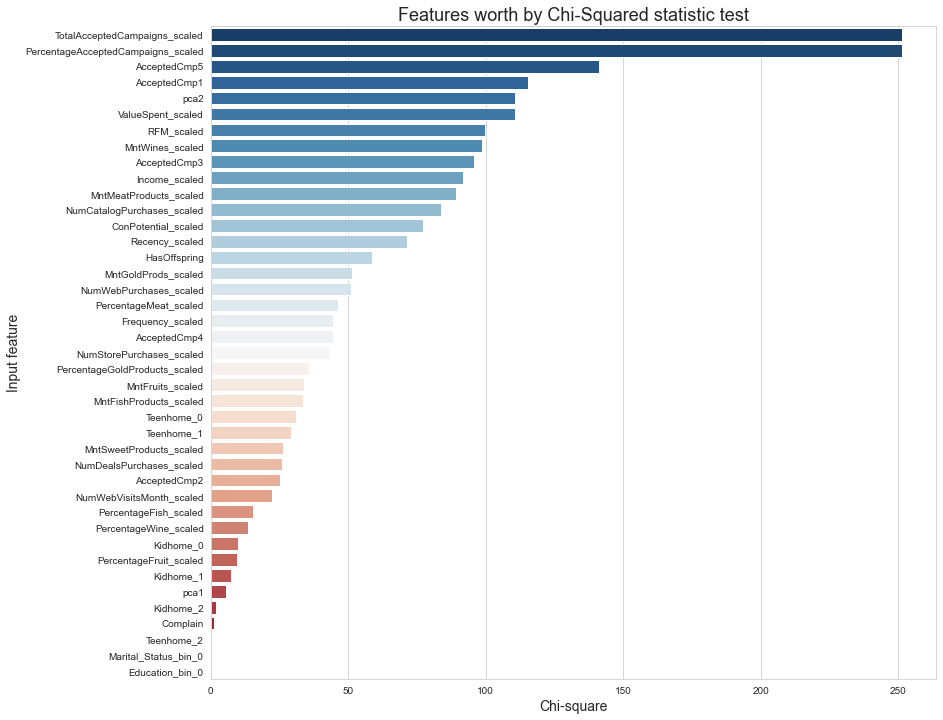

In [80]:
#analysing the features worth (or value) in the data
sns.set_style('whitegrid') 

plt.subplots(figsize=(13,12))
pal = sns.color_palette("RdBu_r", len(df_chisq_rank))
rank = df_chisq_rank['Chi-Squared'].argsort().argsort()  

sns.barplot(y=df_chisq_rank.index,x=df_chisq_rank['Chi-Squared'], palette=np.array(pal[::-1])[rank])
plt.title("Features worth by Chi-Squared statistic test", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Chi-square", fontsize=14)

plt.show()

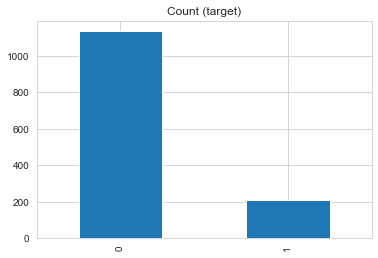

In [81]:
#balance training set
y_train.value_counts().plot(kind='bar', title='Count (target)');

In [82]:
#predictive model
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = scaler.transform(X_test)

In [83]:
#logistic regression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [84]:
#calculating ROC score from the predict
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

ROC score: 1.0


In [85]:
#setting the Gaussian Naive-Bayes classification
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [86]:
#calculating ROC score after the Gaussian-Bayes classification
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

ROC score: 1.0


In [87]:
#using Multilayer Perceptron (MLP) to classify our model
#it receives 'n' inputs and each of them is weighted
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)

In [88]:
#testing the data 
predictions = mlp.predict(X_test)

In [89]:
#printing the predictions array
print(predictions)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 

In [90]:
#Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

[[772   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      1.00      1.00       124

    accuracy                           1.00       896
   macro avg       1.00      1.00      1.00       896
weighted avg       1.00      1.00      1.00       896



In [91]:
#printing the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[772   0]
 [  0 124]]


In [92]:
#checking fit for the last ROC score
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

ROC score: 1.0


# 4 - Business presentation
* It was a good database to work with because there were not many missing values or confusing data;
* In order to achieve the best results possible, new features were created. With this we could see that those who have already responded to previous campaigns and those who have spent the most so far are more likely to give us positive responses in the next campaigns;
* The consumer elimination was minimum in order to preserve original data to the most. One of the next evaluations that can be done is eliminating people that have not responded to any of our campaigns;
* Analysing recency, frequency, total value spent and number of accepted campaigns was a way of engineering new features that could aggregate significant value to the work;
* The proportion of money spent in each product can help us directing and targeting those who have responded to previous campaigns with specific products for their likes and buys;
* When observing frequency, we could not assume whereas our consumers would tend to buy more according to it;
* Having kids and/or teens at home made no significant difference on positively answering the campaigns;
* Complain was not observed to be related to not answering the campaings. As a matter of fact, it did not change much our feature analysis;
* Meat and Wine were the most significant features so a new targeted campaign giving deals and discounts on their prices can get us better outcomes;
* Nonetheless discounts were given on deal products, this was not a major feature on our data as people tended to answer the campaigns no matter there was a discount.